## Efficient Market Hypothesis 

The Efficient Market Hypothesis  is a financial theory that states that asset prices fully reflect all available information.

EMH asserts that it is impossible to "beat the market" consistently on a risk-adjusted basis since market prices should only react to new information. Since new information appears randomly, prices will adjust randomly and unpredictably.

Under the Efficient Market Hypothesis we can model asset prices in the future as

$$ \text{Price today } + X$$

where $X$ is a random variable.


## Normal Distribution

The normal distribution, also called the Gaussian distribution, is a  probability distribution that is defined by two parameters: the mean ($\mu $) and the standard deviation ($ \sigma $).

### Probability Density Function (PDF)
The PDF of the normal distribution is:

$$ f(x|\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right) $$

where $ x $ is a real number, $ \mu $ is the mean, and $ \sigma^2 $ is the variance.



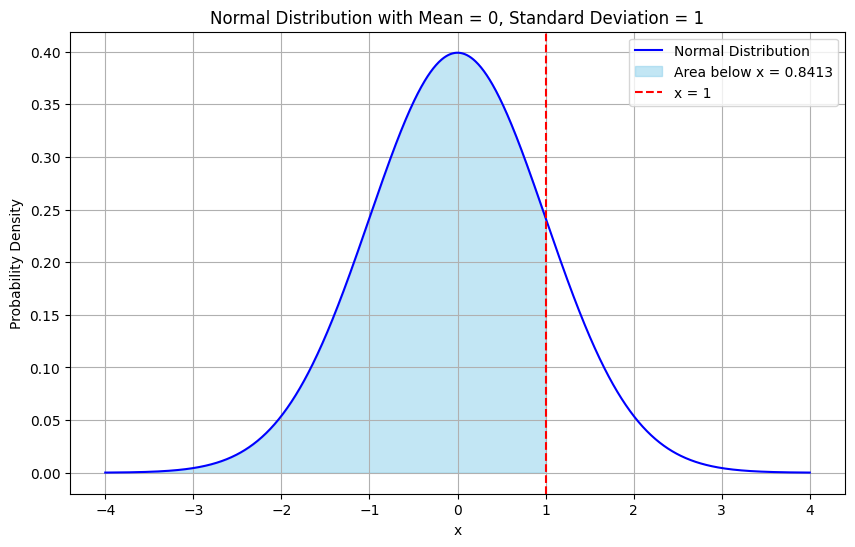

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_normal_distribution(mu, sigma, x_value):
    ''' Plots a normal distribution with mean mu and standard deviation sigma'''
    # Create a range of x values
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

    # Calculate the normal distribution's PDF
    pdf = norm.pdf(x, mu, sigma)
    area = norm.cdf(x_value, mu, sigma)
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x, pdf, label='Normal Distribution', color='blue')
    plt.fill_between(x, pdf, where=(x <= x_value), color='skyblue', alpha=0.5, label=f'Area below x = {area:.4f}')
    plt.axvline(x=x_value, color='red', linestyle='--', label=f'x = {x_value}')
    plt.title(f'Normal Distribution with Mean = {mu}, Standard Deviation = {sigma}')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_normal_distribution(mu=0, sigma=1, x_value=1)



## Problem 1

On October 19, 1987, known as Black Monday, stock markets around the world crashed, with the Dow Jones Industrial Average (DJIA) dropping by about 22% in a single day. Suppose the historical data suggests that the daily returns of the DJIA are normally distributed. The mean daily return is 0.03% and the standard deviation is 1%.

 Calculate the probability of a single-day drop of 22% or more, under the assumption of normally distributed returns.

In [9]:
# Given values for the Black Monday scenario
mu = 0.0003  # Mean daily return (0.03%)
sigma = 0.01  # Standard deviation of daily return (1%)
x = -0.22  # Target return (-22%)

# Calculate the Z-score for the target return
z_score = (x - mu) / sigma

# Calculate the probability using the cumulative distribution function (CDF)
probability = norm.cdf(z_score)

probability

7.428666479276207e-108

[*********************100%%**********************]  1 of 1 completed

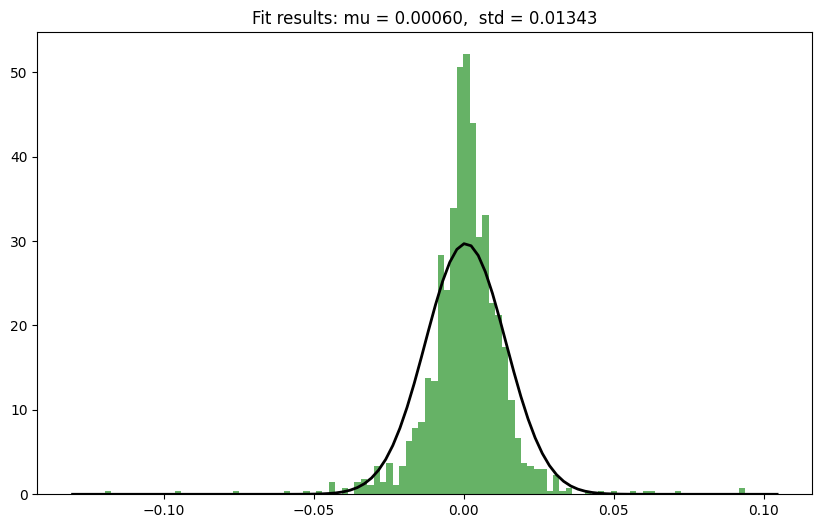

In [6]:
# %pip install yfinance
import yfinance as yf #use pip install yfinance if yfinance not installed
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_real_sp500_returns_with_gaussian():
    # Fetch S&P 500 data from Yahoo Finance
    sp500 = yf.download('^GSPC', start='2019-01-01', end='2024-01-01')

    # Calculate daily returns
    sp500['Daily Return'] = sp500['Adj Close'].pct_change()

    # Drop NaN values
    returns = sp500['Daily Return'].dropna()

    # Plot histogram of the returns
    plt.figure(figsize=(10, 6))
    count, bins, ignored = plt.hist(returns, 100, density=True, alpha=0.6, color='g')

    # Fit a Gaussian curve to the data
    mu, std = norm.fit(returns)

    # Plot the Gaussian curve
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = {:.5f},  std = {:.5f}".format(mu, std)
    plt.title(title)

    plt.show()

plot_real_sp500_returns_with_gaussian()


## Central Limit Theorem (CLT)

The Central Limit Theorem states that the distribution of the normalized version of a sum of independent, identically distributed variables approaches a normal distribution, irrespective of the original distribution of the variables.

Let $ X_1, X_2, \ldots, X_n $ be a sequence of i.i.d. random variables with expected value $ E(X_i) = \mu $ and variance $ \text{Var}(X_i) = \sigma^2$. The CLT tells us that as $ n $ becomes large, the random variable

$$ Z_n = \frac{\sum_{i=1}^{n}X_i - n\mu}{\sigma\sqrt{n}} $$

converges in distribution to a standard normal distribution $ Z_n \xrightarrow{d} N(0,1) $.


## Problem 2

Consider a stock that has a daily return, which can be modeled as a random variable with an unknown distribution. However, from historical data, you know that the mean daily return of the stock is 0.1% and the standard deviation is 1.5%. You are considering investing in this stock and want to assess the risk over the next 50 trading days.

Task: Calculate the probability that the average return of this stock over the next 50 trading days will be less than 0.05%. Use the Central Limit Theorem to solve this problem.

In [18]:
from scipy.stats import norm
def calculate_probability(mu, sigma, n, x):
    # Calculate the standard deviation of the sampling distribution
    sigma_sample = sigma* n**0.5
    # Calculate the Z-score 
    z_score = (x - n*mu) / sigma_sample
    # Calculate the probability using the cumulative distribution function (CDF)
    probability = norm.cdf(z_score)
    
    return probability


mu = 0.001    # Mean daily return (0.1%)
sigma = 0.015 # Standard deviation of daily return (1.5%)
n = 50        # Number of trading days
x = 0.0005*50    # Target average return (0.05%)
probability = calculate_probability(mu, sigma, n, x)
probability

0.40683185788339593

## Problem 3

Suppose you have a fair die. (Namely, when the die is tossed, it is equally likely that any of the six numbers — 1, 2, . . . , 6 — will appear.) 

You are playing a game where, if a 1 or 2 appears, you win $1. If a 3 or 4 appears, you win $2. If a 5
or 6 appears, you lose $3. 

If the game is played a hundred times, what is the likelihood of winning ten or more dollars?

In [12]:
from scipy.stats import norm
def calculate_probability(mu, sigma, n, x):
    # Calculate the standard deviation of the sampling distribution
    sigma_sample = sigma* n**0.5
    # Calculate the Z-score 
    z_score = (x - n*mu) / sigma_sample
    # Calculate the probability using the cumulative distribution function (CDF)
    probability = norm.cdf(z_score)
    
    return probability
    

mu=0
sigma=(14/3)**0.5
P=calculate_probability(mu, sigma, 100, 10)

print(1-P)

0.3217144217818103


## Taylor Series

The Taylor Series expresses a function as an infinite sum of terms calculated from its derivatives at a single point. 

### Definition
For a function $ f(x) $ that is infinitely differentiable at a point $ a $, the Taylor Series of $ f $ at $ a $ is defined as:

$$ f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(a)}{n!}(x - a)^n $$

where:
- $ f^{(n)}(a) $ is the $ n$-th derivative of $ f $ evaluated at the point $ a $,
- $ n! $ is the factorial of $ n $,
- $ (x - a)^n $ is the $ n $-th power of $ (x - a) $.

## Taylor Series Example (Univariate)

Consider the function $ f(x) = e^x $. The Taylor Series expansion of $ f $ around $ a = 0 $  is:

$$
f(x) = e^x = \sum_{n=0}^{\infty} \frac{x^n}{n!}
$$

This series expands to:

$$
e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots
$$

## Multivariate Taylor Series Example

Let's take a multivariate function $f(x, y) = e^{x+y} $. The first-order Taylor Series expansion around the point $ (a, b) = (0, 0) $ is:

$$
f(x, y) \approx f(0, 0) + \frac{\partial f}{\partial x}(0,0)(x - 0) + \frac{\partial f}{\partial y}(0,0)(y - 0)
$$

Given $ f(x, y) = e^{x+y} $, we have:

- $ f(0, 0) = e^0 = 1 $
- $ \frac{\partial f}{\partial x} = e^{x+y} $ and $ \frac{\partial f}{\partial x}(0,0) = 1 $
- $ \frac{\partial f}{\partial y} = e^{x+y} $ and $ \frac{\partial f}{\partial y}(0,0) = 1 $

Thus, the first-order approximation is:

$$
f(x, y) \approx 1 + x + y
$$

Including second-order terms:

$$
f(x, y) \approx 1 + x + y + \frac{1}{2!}\left( \frac{\partial^2 f}{\partial x^2}(0,0)x^2 + 2\frac{\partial^2 f}{\partial x \partial y}(0,0)xy + \frac{\partial^2 f}{\partial y^2}(0,0)y^2 \right)
$$

So, the second-order terms are:

$$
\frac{1}{2}(x^2 + 2xy + y^2)
$$

Including third-order terms:

$$
f(x, y) \approx 1 + x + y + \frac{1}{2}(x^2 + 2xy + y^2) + \frac{1}{3!}\left( \frac{\partial^3 f}{\partial x^3}(0,0)x^3 + 3\frac{\partial^3 f}{\partial x^2 \partial y}(0,0)x^2y + 3\frac{\partial^3 f}{\partial x \partial y^2}(0,0)xy^2 + \frac{\partial^3 f}{\partial y^3}(0,0)y^3 \right)
$$

With all third-order partial derivatives of $ e^{x+y} $ equal to $ e^{x+y} $ and thus equal to 1 at $ (0,0) $, the third-order terms simplify to:

$$
\frac{1}{6}(x^3 + 3x^2y + 3xy^2 + y^3)
$$

Combining all these, the approximation up to the third order is:

$$
f(x, y) \approx 1 + x + y + \frac{1}{2}(x^2 + 2xy + y^2) + \frac{1}{6}(x^3 + 3x^2y + 3xy^2 + y^3)
$$


In [28]:
import sympy 
sympy.init_printing()
# IDK if this works for everything, use it only to check the answer
def calculate_taylor_series(function, variables, point, order):
    """
    Calculate and print the Taylor series expansion of a given function in a pretty format.

    Parameters:
    function (sympy expression): The function to be expanded.
    variables (list of sympy symbols): The variables in the function.
    point (list of numbers): The point around which to expand the function.
    order (int): The order up to which to expand the series.
    """
    point_dict = dict(zip(variables, point))

    # Create a multi-dimensional Taylor series expansion
    series_expansion = function.series(variables[0], point[0], order).removeO()
    
    for var, pt in zip(variables[1:], point[1:]):
        series_expansion = series_expansion.series(var, pt, order).removeO()
    

    return series_expansion


# Example usage
x, y = sympy.symbols('x y')
f = sympy.cos(x)  # Example function
variables = [x]  # Variables in the function
point = [1, 1]     # Point of expansion
order =4          # Order of the series

taylor_series = calculate_taylor_series(f, variables, point, order)


taylor_series